# Stroke prediction
## P2: EDA

In [319]:
import jenkspy as jenkspy
import pandas as pd
import numpy as np
import seaborn as sns

In [320]:
df= pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [321]:
corrtable = df.corr()
corrtable

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


<AxesSubplot:>

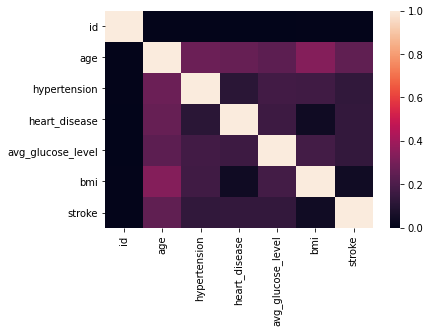

In [322]:
sns.heatmap(corrtable)

## Summery of dataset when stroke is 0

In [323]:
df[df['stroke'] == 0].describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4700.000000,4861.0
mean,36487.236371,41.971545,0.088871,0.047110,104.795513,28.823064,0.0
std,21120.133386,22.291940,0.284586,0.211895,43.846069,7.908287,0.0
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.0
25%,17762.000000,24.000000,0.000000,0.000000,77.120000,23.400000,0.0
50%,36958.000000,43.000000,0.000000,0.000000,91.470000,28.000000,0.0
75%,54497.000000,59.000000,0.000000,0.000000,112.830000,33.100000,0.0
max,72940.000000,82.000000,1.000000,1.000000,267.760000,97.600000,0.0


## Summery of dataset when stroke is 1

In [324]:
df[df['stroke'] == 1].describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,249.000000,249.000000,249.000000,249.000000,249.000000,209.000000,249.0
mean,37115.068273,67.728193,0.265060,0.188755,132.544739,30.471292,1.0
std,21993.344872,12.727419,0.442254,0.392102,61.921056,6.329452,0.0
min,210.000000,1.320000,0.000000,0.000000,56.110000,16.900000,1.0
25%,17013.000000,59.000000,0.000000,0.000000,79.790000,26.400000,1.0
50%,36706.000000,71.000000,0.000000,0.000000,105.220000,29.700000,1.0
75%,56669.000000,78.000000,1.000000,0.000000,196.710000,33.700000,1.0
max,72918.000000,82.000000,1.000000,1.000000,271.740000,56.600000,1.0


## Categories of **work_type**

In [325]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

## Categories of **smoking_status**

In [326]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

## heart disease and stroke

In [327]:
cross_tab_heart_disease = pd.crosstab(df['heart_disease'],df['stroke'])
cross_tab_heart_disease

stroke,0,1
heart_disease,,
0,4632,202
1,229,47


<AxesSubplot:xlabel='heart_disease'>

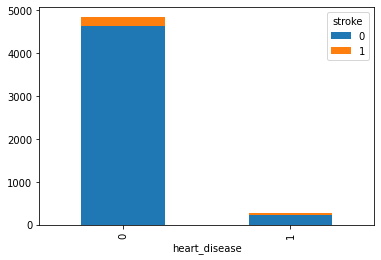

In [328]:
cross_tab_heart_disease.plot(kind='bar',stacked = True)

<AxesSubplot:xlabel='heart_disease'>

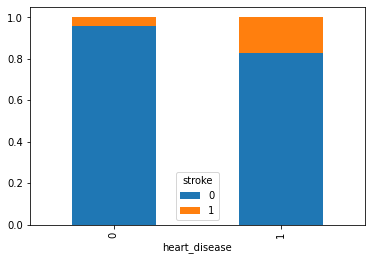

In [329]:
cross_tab_heart_disease_norm = cross_tab_heart_disease.div(cross_tab_heart_disease.sum(1),axis=0)
cross_tab_heart_disease_norm.plot(kind='bar',stacked = True)

## smoking_state and stroke

In [330]:
cross_tab_smoking = pd.crosstab(df['smoking_status'],df['stroke'])
cross_tab_smoking

stroke,0,1
smoking_status,,
Unknown,1497,47
formerly smoked,815,70
never smoked,1802,90
smokes,747,42


<AxesSubplot:xlabel='smoking_status'>

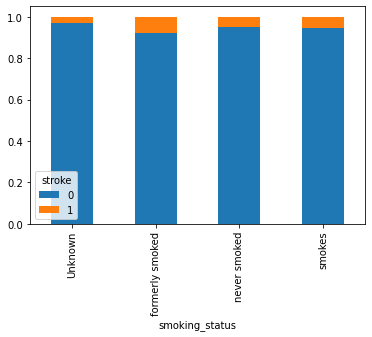

In [331]:
cross_tab_smoking_norm = cross_tab_smoking.div(cross_tab_smoking.sum(1),axis=0)
cross_tab_smoking_norm.plot(kind='bar',stacked = True)

## gender and stroke

In [332]:
cross_tab_gender = pd.crosstab(df['stroke'],df['gender'])
cross_tab_gender

gender,Female,Male,Other
stroke,,,
0,2853,2007,1
1,141,108,0


In [333]:
round(cross_tab_gender.div(cross_tab_gender.sum(0),axis=1)*100,1)

gender,Female,Male,Other
stroke,,,
0,95.3,94.9,100.0
1,4.7,5.1,0.0


<AxesSubplot:xlabel='stroke'>

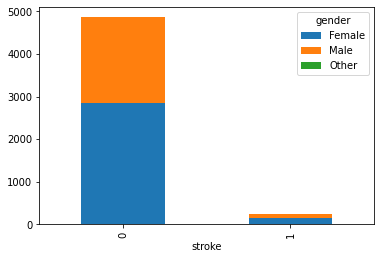

In [334]:
cross_tab_gender.plot(kind='bar',stacked = True)

<AxesSubplot:xlabel='stroke'>

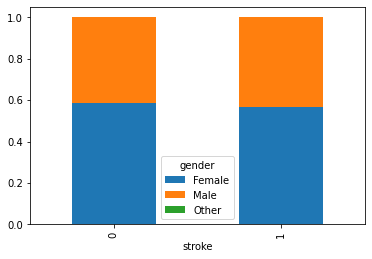

In [335]:
cross_tab_gender_norm = cross_tab_gender.div(cross_tab_gender.sum(1),axis=0)
cross_tab_gender_norm.plot(kind='bar',stacked = True)

## age and stroke (overlay)

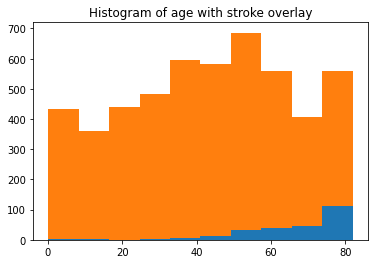

In [336]:
import matplotlib.pyplot as plt
age_1=df[df.stroke==1]["age"]
age_0=df[df.stroke==0]["age"]
plt.hist([age_1,age_0],bins=10,stacked=True)
plt.title('Histogram of age with stroke overlay')
#plt.xlable('Age')
#plt.ylable('Frequency')
plt.show()

## ever_married and stroke

In [337]:
cross_tab_married = pd.crosstab(df['ever_married'],df['stroke'])
cross_tab_married

stroke,0,1
ever_married,,
No,1728,29
Yes,3133,220


<AxesSubplot:xlabel='ever_married'>

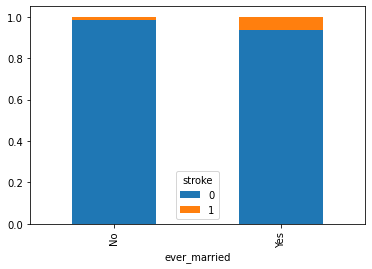

In [338]:
cross_tab_married_norm = cross_tab_married.div(cross_tab_married.sum(1),axis=0)
cross_tab_married_norm.plot(kind='bar',stacked = True)

## avg_glucose_level and stroke

[55.12, 77.83, 99.16, 128.04, 171.23, 213.54, 271.74]


<AxesSubplot:xlabel='avg_glucose_level jenkspy'>

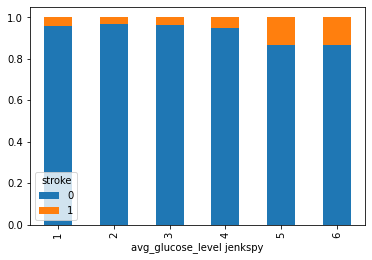

In [339]:
breaks = jenkspy.jenks_breaks(df['avg_glucose_level'], nb_class=6)
print(breaks)
df['avg_glucose_level jenkspy'] = pd.cut(df['avg_glucose_level'], bins=breaks, labels=["1", "2", "3", "4", "5", "6"])
cross_tab2 = pd.crosstab(df['avg_glucose_level jenkspy'], df['stroke'])
cross_tab2_normal = cross_tab2.div(cross_tab2.sum(1), axis=0)
cross_tab2_normal.plot(kind='bar', stacked=True)

## bmi and stroke

c:\_uni\term8\datamining\project\venv\lib\site-packages\jenkspy\core.py:103: UserWarning: Invalid values encountered (NaN or Inf) were ignored
  warnings.warn('Invalid values encountered (NaN or Inf) were ignored')


[10.3, 22.8, 29.2, 36.2, 46.9, 97.6]


<AxesSubplot:xlabel='bmi jenkspy'>

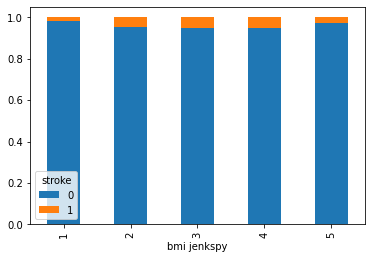

In [340]:
breaks = jenkspy.jenks_breaks(df['bmi'], nb_class=5)
print(breaks)
df['bmi jenkspy'] = pd.cut(df['bmi'], bins=breaks, labels=["1", "2", "3", "4", "5"])
cross_tab2 = pd.crosstab(df['bmi jenkspy'], df['stroke'])
cross_tab2_normal = cross_tab2.div(cross_tab2.sum(1), axis=0)
cross_tab2_normal.plot(kind='bar', stacked=True)

In [341]:
df=df.drop(columns=['bmi jenkspy','avg_glucose_level jenkspy'])
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## pairplot of dataset

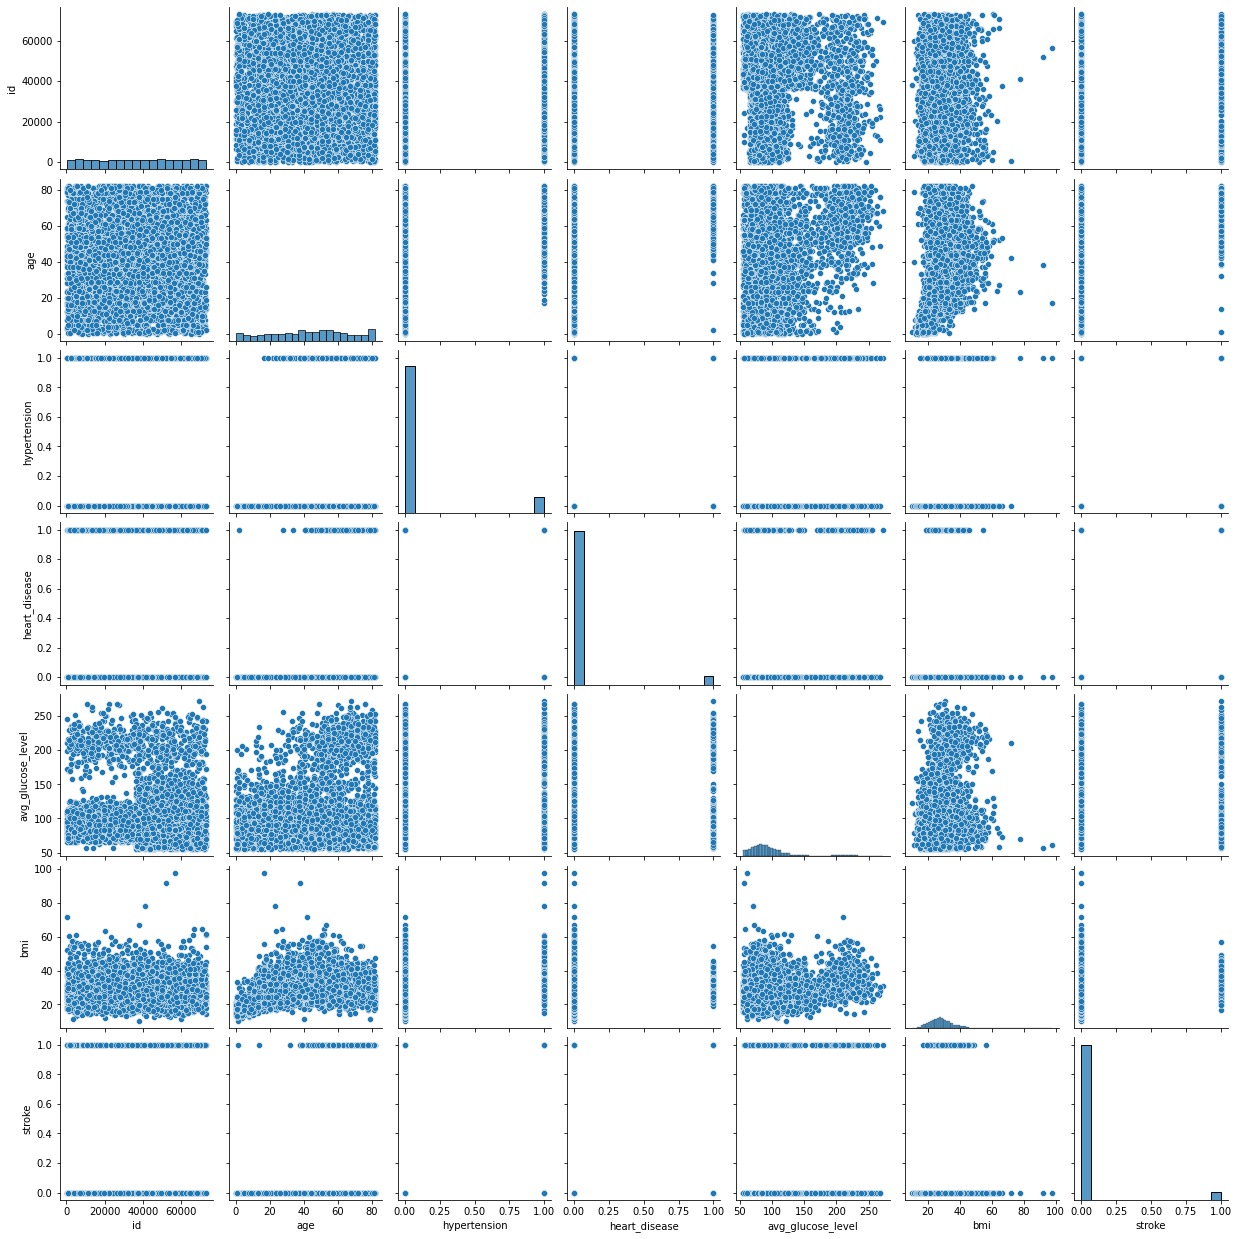

In [342]:
sns.pairplot(df)

